In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [3]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


![Screenshot From 2025-05-03 23-12-47.png](<attachment:Screenshot From 2025-05-03 23-12-47.png>)

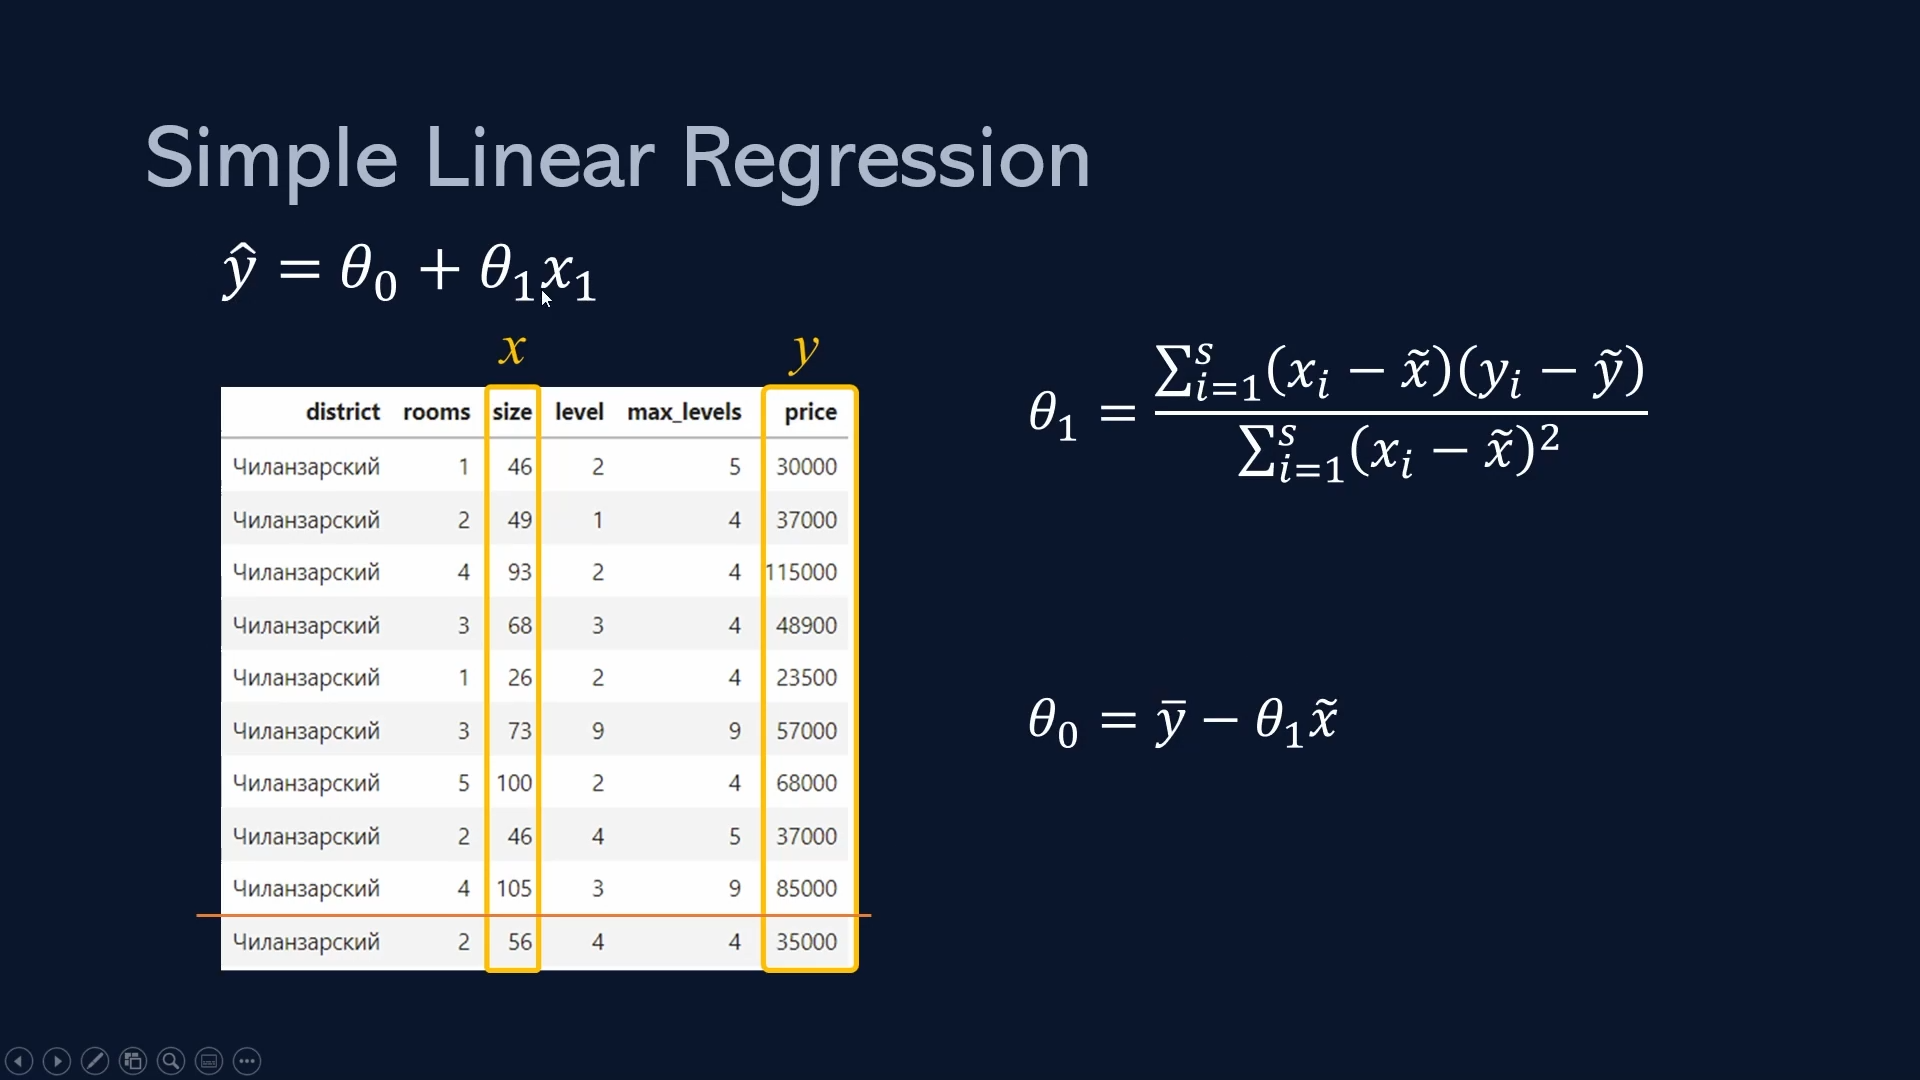

In [10]:
df["district"].value_counts()

district
Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: count, dtype: int64

In [4]:
housing = df[df['district']=="Чиланзарский"]
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [16]:
X = housing["size"].to_numpy()
X

array([42., 65., 70., ..., 32., 70., 30.])

In [17]:
Y = housing["price"].to_numpy()
Y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

In [18]:
Xmean = np.mean(X)
Xmean

np.float64(61.90783415841584)

In [19]:
Ymean = np.mean(Y)
Ymean

np.float64(45617.487623762376)

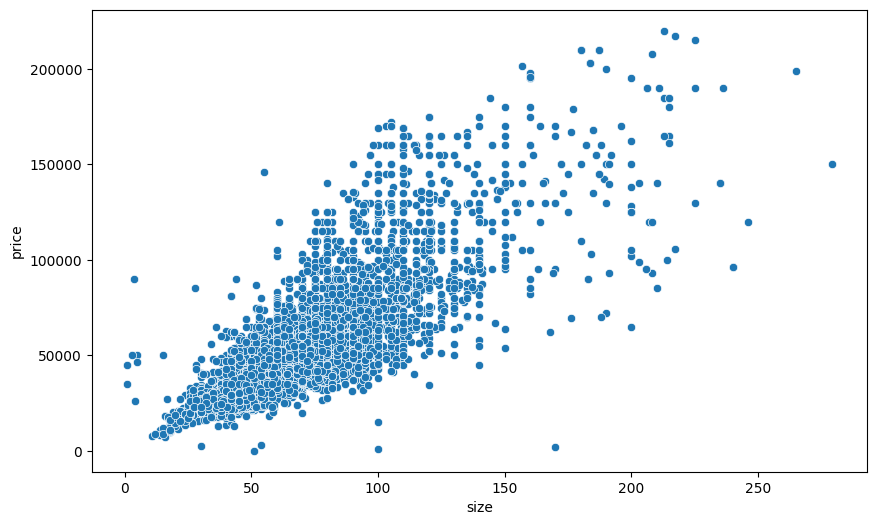

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="size",y="price" )
plt.show()

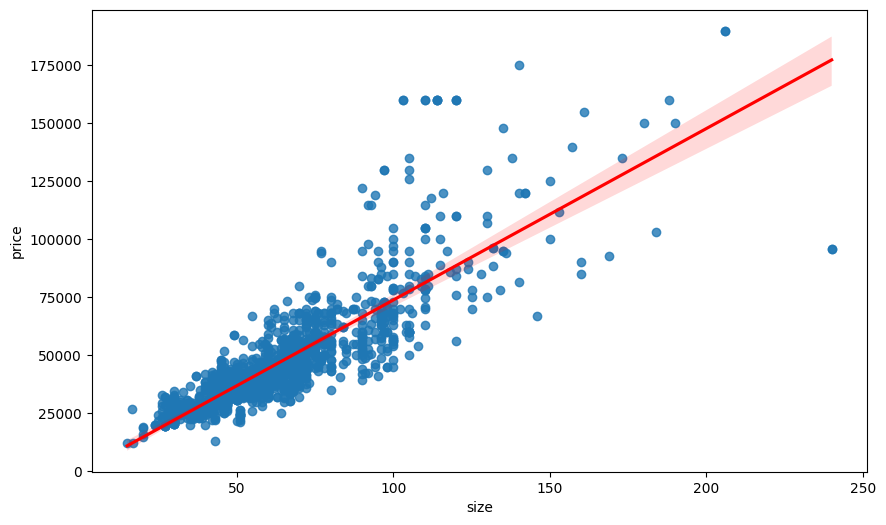

In [23]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

# 1-Vazifa
Sizning vazifangiz yuqoridagi `X` va `y` o'zgaruvchilardan quyidagi formuladan foydalangan xolda $\theta_0$ va $\theta_1$ koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda $\tilde{x}$ - `X` ustun uchun o'rtracha qiymat,  $\tilde{y}$ - `y` ustun uchun o'rtracha qiymat

In [28]:
theta1 = sum((X-Xmean)*(Y-Ymean))/sum((X-Xmean)**2)
print(f"{theta1 = }")

theta1 = np.float64(740.0264822713287)


In [27]:
theta0 = Ymean-theta1*Xmean
print(f"{theta0 = }")

theta0 = np.float64(-195.94911352690542)


## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [36]:
x_test = housing.sample(10, random_state=42)["size"]
y_test = housing.sample(10, random_state=42)["price"]
print(f"X_test\n{x_test} \nY_test\n{y_test}")


X_test
392     54.0
6641    42.0
4251    36.0
5161    60.0
4157    48.0
5662    68.0
7182    38.0
1245    65.0
4736    52.0
938     44.0
Name: size, dtype: float64 
Y_test
392     37500.0
6641    26500.0
4251    25500.0
5161    39000.0
4157    32500.0
5662    34500.0
7182    22700.0
1245    47000.0
4736    37900.0
938     36000.0
Name: price, dtype: float64


In [37]:
y_predict = theta0+theta1*x_test
y_predict

392     39765.480929
6641    30885.163142
4251    26445.004248
5161    44205.639823
4157    35325.322035
5662    50125.851681
7182    27925.057213
1245    47905.772234
4736    38285.427965
938     32365.216106
Name: size, dtype: float64

## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [51]:
MAE = sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE = }")

MAE = 4140.35031634715


In [52]:
RMSE = np.sqrt(sum(np.absolute(y_predict-y_test)**2)/len(y_test))
print(f"{RMSE = }")

RMSE = np.float64(5882.051673173715)


Sklearn modelidan Linear Ression modelini chaqarib olamiz


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.1, random_state=42)

In [13]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[["size"]])
y_train = np.asanyarray(train_set[["price"]])

LR_model.fit(x_train, y_train)

theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=np.float64(732.7784051414766)
theta0=np.float64(106.31843170110369)


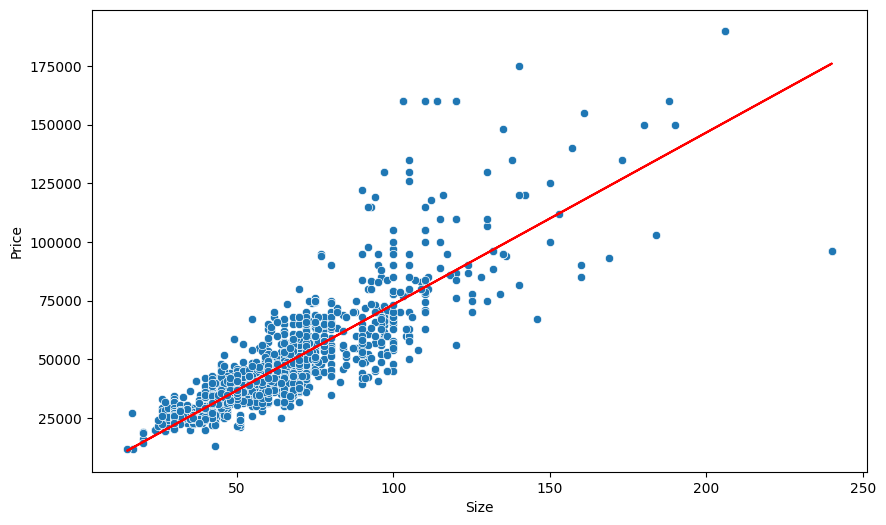

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

In [ ]:
x_test = np.asanyarray(test_set[["size"]])
y_test = np.asanyarray(test_set[["price"]])

NameError: name 'np' is not defined

In [26]:
y_predict = LR_model.predict(x_test)

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))

print(f"{MAE=}")
print(f"{RMSE=}")

NameError: name 'y_test' is not defined